# 임포트

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'            # 자기 경로를 쓰기

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/MyDrive/Colab Notebooks/180일/프로젝트/1_2/'

Mounted at /gdrive
중간저장	   list.txt	  reviews_2.csv  reviews.csv
google_review.csv  reviews_1.csv  reviews_3.csv  star_time.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

In [4]:
import pandas as pd
import numpy as np
import collections

# 데이터 전처리

In [ ]:
# df 가져오기
df = pd.read_csv(drive_path + 'reviews_2.csv', encoding='utf-8').iloc[:, 1:]
df.head()

,star,time,review_content
0,5,1달,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,2달,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,5달,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,6달,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,2달,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [ ]:
# 기간 정리
time_temp = list(set(df['time'].values))
time_temp2 = sorted([t[::-1] for t in time_temp])
time_temp3 = [t[::-1] for t in time_temp2]
print(time_temp3)

['10년', '1년', '2년', '3년', '4년', '5년', '6년', '7년', '8년', '9년', '10달', '1달', '11달', '2달', '3달', '4달', '5달', '6달', '7달', '8달', '9달', '4일', '6일', '1주', '2주', '3주', '4주']


In [ ]:
# 가지고 있는 퍼센트
for i in range(1, 6):
    print(len(df[df['star'] == i]) / len(df) * 100, '%')

print(len(df))

5.119887165021156 %
5.768688293370945 %
18.42031029619182 %
30.155148095909734 %
40.53596614950635 %
7090


In [ ]:
# df1 : 4일 ~ 11달 까지 0년으로 처리
# df['time'][0] # '1달'
df1 = df.copy()
for i in range(len(df1)):
    if df1['time'][i] in time_temp3[10:]:
        df1['time'][i] = '0년'
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,star,time,review_content
0,5,0년,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0년,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0년,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0년,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0년,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [ ]:
# time을 숫자로 바꾸기
for i in range(len(df1)):
    df1['time'][i] = int(df1['time'][i][:-1])

df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [ ]:
# 별, 기간 순으로 정리
def make_star_df(df, star_num):
    return df[df['star'] == star_num]

def make_time_df(df, p_time):
    return df[df['time'] == p_time]

df_s1 = make_star_df(df1, 1)
df_s2 = make_star_df(df1, 2)
df_s3 = make_star_df(df1, 3)
df_s4 = make_star_df(df1, 4)
df_s5 = make_star_df(df1, 5)

df_0y = make_time_df(df1, 0)
df_1y = make_time_df(df1, 1)
df_2y = make_time_df(df1, 2)
df_3y = make_time_df(df1, 3)
df_4y = make_time_df(df1, 4)
df_5y = make_time_df(df1, 5)
df_6y = make_time_df(df1, 6)
df_7y = make_time_df(df1, 7)
df_8y = make_time_df(df1, 8)
df_9y = make_time_df(df1, 9)
df_10y = make_time_df(df1, 10)


In [ ]:
df_stars = [df_s1, df_s2, df_s3, df_s4, df_s5]
df_years = [df_0y, df_1y, df_2y, df_3y, df_4y, df_5y, df_6y, df_7y, df_8y, df_9y, df_10y]

In [ ]:
dict_basic = {}
for i in range(11):
    dict_basic[i] = 0
df_dict = dict(collections.Counter(df_s1['time'].values))
dict_basic.update(df_dict)
dict_basic

{0: 28, 1: 43, 2: 80, 3: 135, 4: 56, 5: 16, 6: 2, 7: 2, 8: 0, 9: 0, 10: 1}

In [ ]:
def dict_maker(df, num=11, columns='time'):
    dict_basics = {}
    for i in range(num):
        dict_basics[i] = 0
    df_dict = dict(collections.Counter(df[columns].values))
    dict_basics.update(df_dict)
    return dict_basics

a = dict_maker(df_s1)
a

{0: 28, 1: 43, 2: 80, 3: 135, 4: 56, 5: 16, 6: 2, 7: 2, 8: 0, 9: 0, 10: 1}

In [ ]:
y = {1: 'one', 2: 'two'}
y.update({1: 'ONE', 3: 'THREE'})
y

{1: 'ONE', 2: 'two', 3: 'THREE'}

In [ ]:
for i in df_stars:
    print(len(i))

363
409
1306
2138
2874


In [ ]:
x = 0
for i in df_years:
    print(len(i))
    x += len(i)

print(x)

877
1221
1560
2093
1050
220
50
11
1
6
1
7090


In [ ]:
# 연도별 총 리뷰 수 및 별점 추이
# Line graph by seaborn
ax = sns.lineplot(data=df.T.loc['2011.0':'2021.0', g_k])


plt.title('Renewalbe Energy', fontsize=20)
plt.ylabel('%', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')

sns.set(rc = {'figure.figsize':(20,8)})
plt.show()

NameError: ignored

In [ ]:
df1.head()

,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [ ]:
star_time = pd.DataFrame({  1 : dict_maker(df_s1),
                            2 : dict_maker(df_s2),
                            3 : dict_maker(df_s3),
                            4 : dict_maker(df_s4),
                            5 : dict_maker(df_s5)
                                })

star_time

,1,2,3,4,5
0,28,33,126,263,427
1,43,54,188,332,604
2,80,103,280,491,606
3,135,124,412,639,783
4,56,75,233,326,360
5,16,18,45,65,76
6,2,1,19,16,12
7,2,1,2,3,3
8,0,0,0,1,0
9,0,0,1,2,3


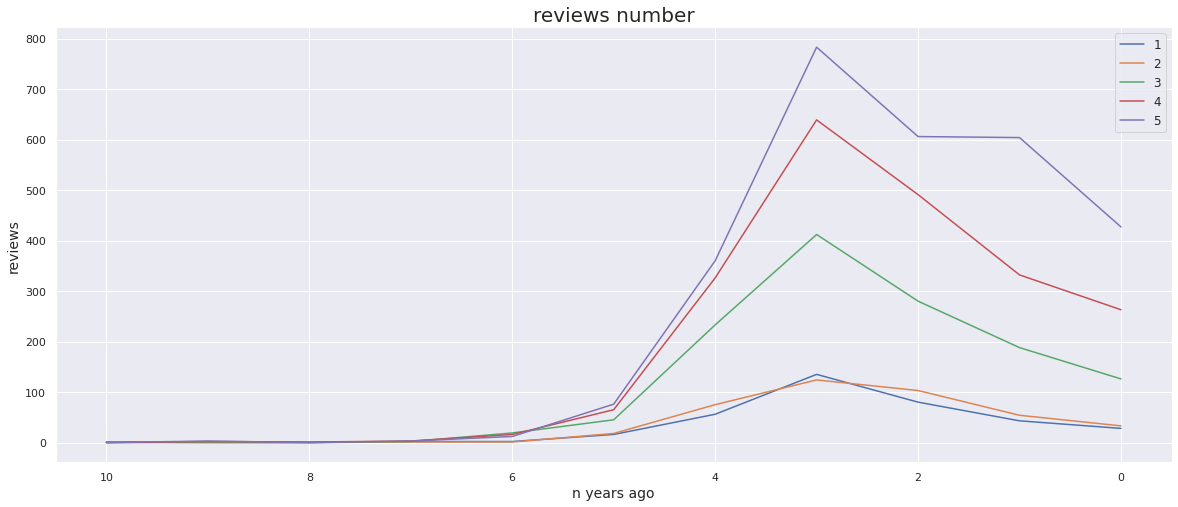

<Figure size 1440x576 with 0 Axes>

In [ ]:
ax = star_time.plot()
ax.invert_xaxis()

plt.title('reviews number', fontsize=20)
plt.ylabel('reviews', fontsize=14)
plt.xlabel('n years ago', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.figure(figsize=(20,8))
plt.show()

In [ ]:
star_time.sum(axis=1)

0      877
1     1221
2     1560
3     2093
4     1050
5      220
6       50
7       11
8        1
9        6
10       1
dtype: int64

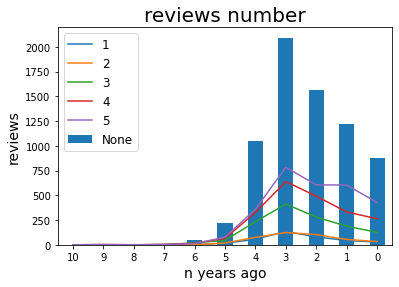

<Figure size 1440x576 with 0 Axes>

In [ ]:
ax = star_time.plot()
ax2 = star_time.sum(axis=1).plot.bar(rot=0)
ax.invert_xaxis()

plt.title('reviews number', fontsize=20)
plt.ylabel('reviews', fontsize=14)
plt.xlabel('n years ago', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.figure(figsize=(20,8))
plt.show()

In [ ]:
star_time

,1,2,3,4,5
0,28,33,126,263,427
1,43,54,188,332,604
2,80,103,280,491,606
3,135,124,412,639,783
4,56,75,233,326,360
5,16,18,45,65,76
6,2,1,19,16,12
7,2,1,2,3,3
8,0,0,0,1,0
9,0,0,1,2,3


In [ ]:
star_time_temp = star_time.copy()

In [ ]:
st_col = np.array(star_time_temp.columns)

In [ ]:
star_time_temp['mean'] = star_time.apply(lambda x: (np.dot(st_col, np.array(x)) / sum(x)), axis=1)

In [ ]:
star_time_temp

,1,2,3,4,5,mean
0,28,33,126,263,427,4.172178
1,43,54,188,332,604,4.146601
2,80,103,280,491,606,3.923077
3,135,124,412,639,783,3.865265
4,56,75,233,326,360,3.818095
5,16,18,45,65,76,3.759091
6,2,1,19,16,12,3.700000
7,2,1,2,3,3,3.363636
8,0,0,0,1,0,4.000000
9,0,0,1,2,3,4.333333


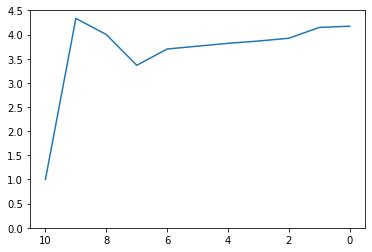

In [ ]:
ys = star_time_temp['mean'].to_list()
xs = star_time_temp.index.to_list()

plt.gca().invert_xaxis()
plt.ylim(0, 4.5)
plt.plot(xs, ys)

In [ ]:
'''
지도에 관광코스 추천? 
    - 맵핑으로 마카 위치 표시 : 가지 말아야 할 곳!
리뷰에 코스도 나와있음
맛집, 피해야할 곳 

'''

In [ ]:
# 다시 한번 세이브
df1.to_csv(drive_path + 'google_review.csv', encoding='utf-8', index = False)
star_time.to_csv(drive_path + 'star_time.csv', encoding='utf-8', index = False)

# 단어 분석

### 데이터 불러오기

In [5]:
# 불러오기
reviews = pd.read_csv(drive_path + 'google_review.csv', encoding='utf-8')
st = pd.read_csv(drive_path + 'star_time.csv', encoding='utf-8')

In [ ]:
reviews.head()

,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [ ]:
st

,1,2,3,4,5
0,28,33,126,263,427
1,43,54,188,332,604
2,80,103,280,491,606
3,135,124,412,639,783
4,56,75,233,326,360
5,16,18,45,65,76
6,2,1,19,16,12
7,2,1,2,3,3
8,0,0,0,1,0
9,0,0,1,2,3


# 별점, 시간순으로 단어 분석 및 시각화

In [6]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install konlpy==0.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 453 kB 54.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [8]:
!pip install tweepy==3.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from tqdm import tqdm_notebook 
from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Okt

import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [ ]:
from konlpy.tag import Okt

tokenizer = Okt()
tokens = tokenizer.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(tokens)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [10]:
reviews.head()

,star,time,review_content
0,5,0,전북 전주 한옥마을한옥들이 즐비한 한옥마을 ~~날씨가 선선해서 여행하기 좋았습니다....
1,5,0,"1박 2일로 전주한옥마을 방문했었는데, 전라도를 다녀온 사람들은 다들 바가지 안씌우..."
2,5,0,4번째 방문입니다.어디로 가든 중간에 들려서 2~3시간은 걷고 먹고 즐기는 코스입니...
3,4,0,한옥마을 다니려면 오전에 공영주차장에 주차를 하고 다니면 좋을것 같아요오후에는 금방...
4,5,0,가족들과 함께 어린이날에 방문했는데 사람들이 겁나 많았고 가는데도 시간이 4시간 정...


In [16]:
# 별점 순으로 단어 분석하기
s0 = reviews[reviews['star'] == 1]['review_content'].tolist()
len(s0)

363

In [17]:
s0_join = ' '.join(s0)
s0_join[:1000]

'전체적으로 음식가격이나 물건가격이 넘 비싸고  중간중간에 한옥마을에 대해설명이나 안내할수있는 부스도 없고표지판도 없어서 이쪽저쪽 그냥걷다음식먹고 체험이라곤 뭐하나 제대로 없이가게한쪽구석에 앉아서 한두명이 하는것뿐쉬면서  쉴수있는공간도 없고  편안하게 볼수있는  공연하나 찾아볼수없었네요 볼게 없음.장사의 거리임성당만 볼만하네요. 성당이 다 한한옥마을, 아니, 한옥 상점입니다 전주식당 (공영주차장옆) 절대 가지 마세요. 가시면 후회할거임 ~원래 비빔밥은 맛이 없을수 없는 음식인데....먹으면서 맛없다는  생각을 몇번이나 했어요. 12000원짜리 전주 비빔밥...도지사 표창도 받았다고 적어놓았지만 ..너무 맛 없어육회비빔밥은....육회가 신선하지 못해서 ....맛도없고 생고기 씹는듯..결국 반남김가시면 후회해요. 돈 아까움. 1년에 천만명이 다녀간다는데 전주 식당에서 호갱됐음. 한옥은 별로 없고 잘 보이지도 않고 정말 정말 볼것없고 사람만 많고 음식먹으러 야시장 온 느낌. 왜 한옥마을인건지 알수가 없네요~친구들이랑한복입고 추억남길 사진찍으러 올거면 추천, 한복도 안입고 그냥 돌아다니거면 완전비추.길거리음식 먹을거 외에 볼게 하나도없어서 이 먼거리 여행을 야시장 볼려고 왔나싶음 .주차장 또한 와 엄청납니다. 차 댈곳이 없어서 주차하는데만 시간 엄청 오래걸립니다.오히려 진짜 한옥마을 보고 싶다면 서울 북촌한옥마을을 추천합니다 .그리고 교동한식 한정식 식당은  가격에 비해 먹을음식이 별로없네요 .교동한식 식당에서 사진에 음식이 1인당12000원이래요~낙지볶음이 다 떨어졌다고 낙지볶음이랑 가격이 같은 5천원짜리 버섯구이를 주신다길래 그러시라고했더니 달랑 저 4조각 나왔네요.ㅎ 사진에 보이는 저 버섯구이가 5천원짜리래요.헉!!! 볼게 없음 한옥마을에서 이것저것 사진찍고싶은데 가보니 사진찍을곳은 딱히없고 식당,카페,숙박업소,다른나라음식파는가게 이런것만 심하게많음 호갱당하기 가장좋은 장소가 바로이곳 돈이넘처서 돈뿌리고다니고싶다는 사람은 가도됨. 다만 음식은 좀 맛있음 여름휴가

In [ ]:
len(s0_join)

22131

In [ ]:
tokenizer = Okt()
s0_tagged = tokenizer.pos(s0_join, norm=True, stem=True)
s0_tagged

In [24]:
for s in s0_tagged:
    if s[0] == '많이': print(s[1])

Adverb
Adverb
Adverb
Modifier
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Adverb
Modifier


In [ ]:
# 불용어 처리
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in s0_tagged: #  ('서울', 'Noun'),
    # 튜플은 이렇게 꺼낼 수 있다.
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

In [ ]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

word_dic

In [ ]:
# sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True) 
# sorted_word_dic

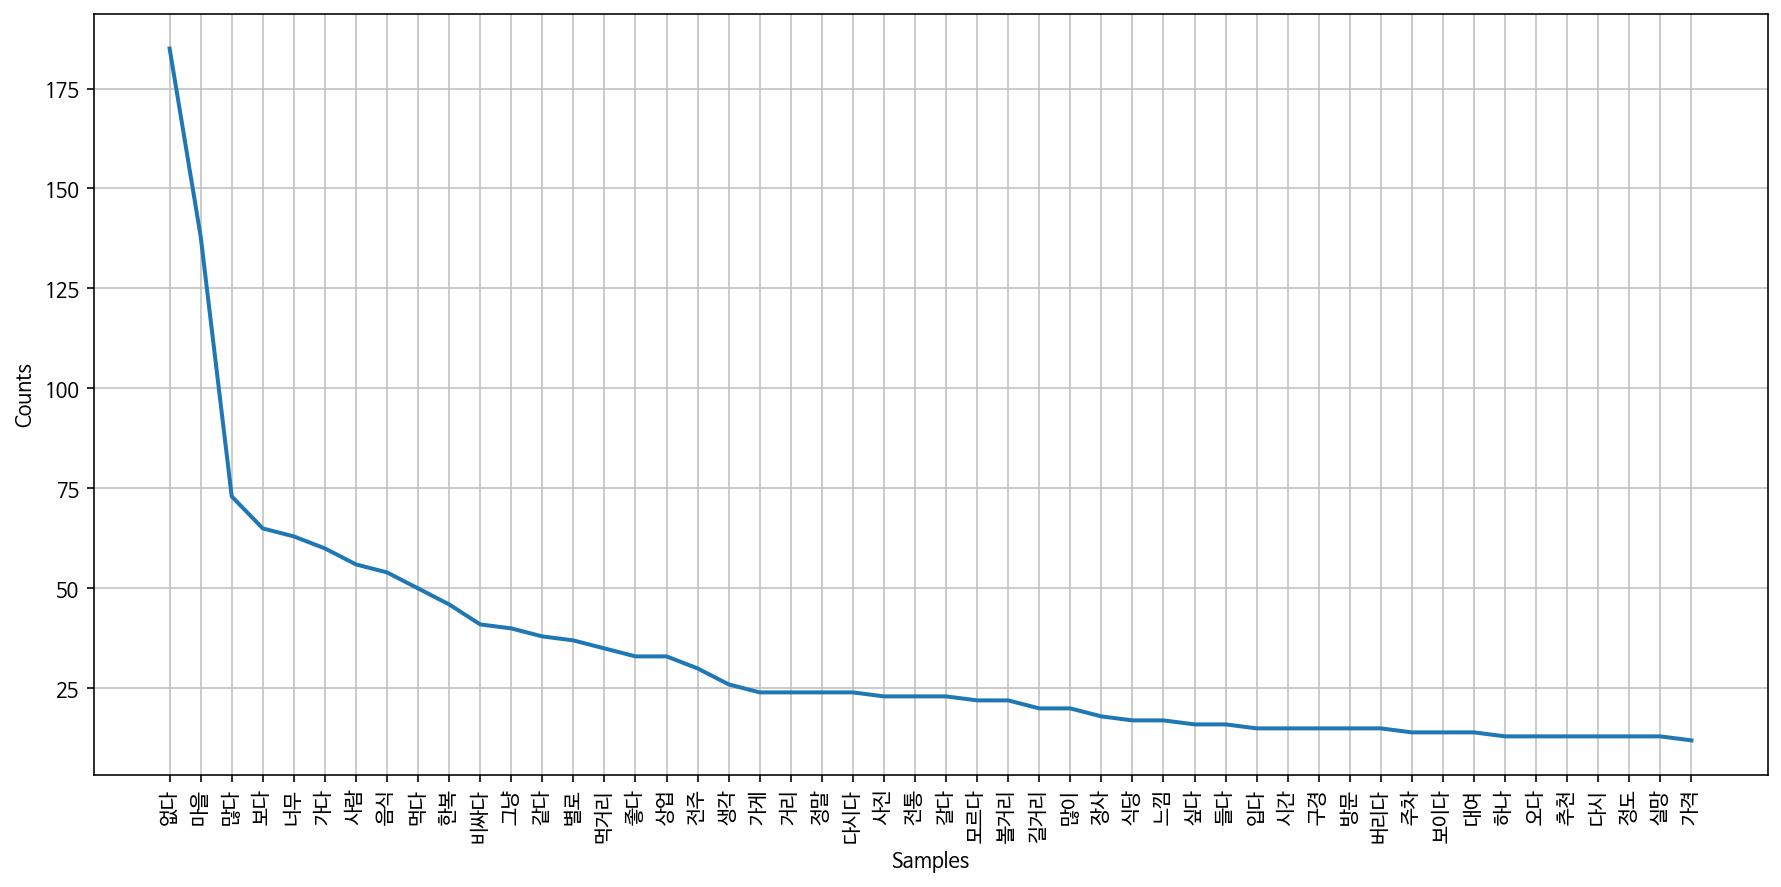

In [20]:
word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

### 함수 테스트

In [11]:
# df와 몇 가지 정보를 입력하면, 그래프와 word_list를 출력해주는 함수
def review_analysis(df, condition, conditon_value, *save):
    df1 = df[df[condition] == conditon_value]['review_content'].tolist()
    df_join = ' '.join(df1)

    tokenizer = Okt()
    df_tagged = tokenizer.pos(df_join, norm=True, stem=True)

    del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

    word_cleaned = []
    for word in df_tagged: 
        if word[1] in list(save): # Foreign == ”, “ 와 같이 제외되어야할 항목들
            if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
                word_cleaned.append(word[0])

    word_dic = {}
    for word in word_cleaned:
        if word not in word_dic:
            word_dic[word] = 1 
        else:
            word_dic[word] += 1

    sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True) 

    return word_cleaned, sorted_word_dic

In [12]:
word_cleaned, sorted_word_dic = review_analysis(reviews, 'star', 1, 'Noun')

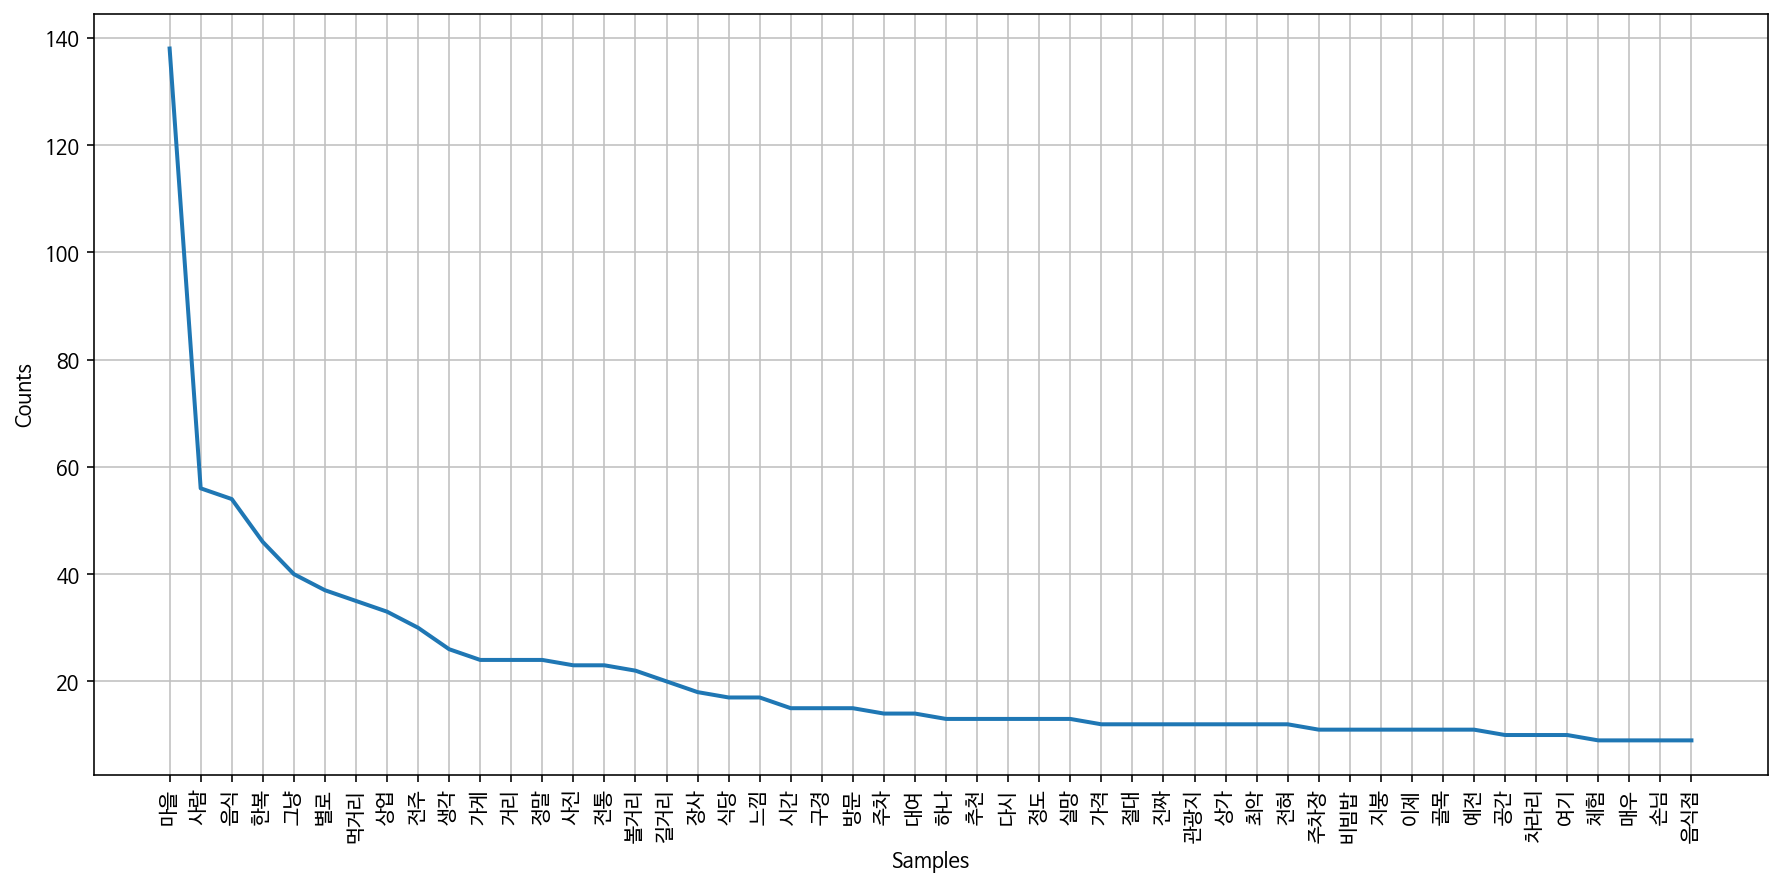

In [13]:
word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

In [25]:
word_cleaned, sorted_word_dic = review_analysis(reviews, 'star', 1, 'Adverb' 'Modifier', 'Verb', 'Adjective')


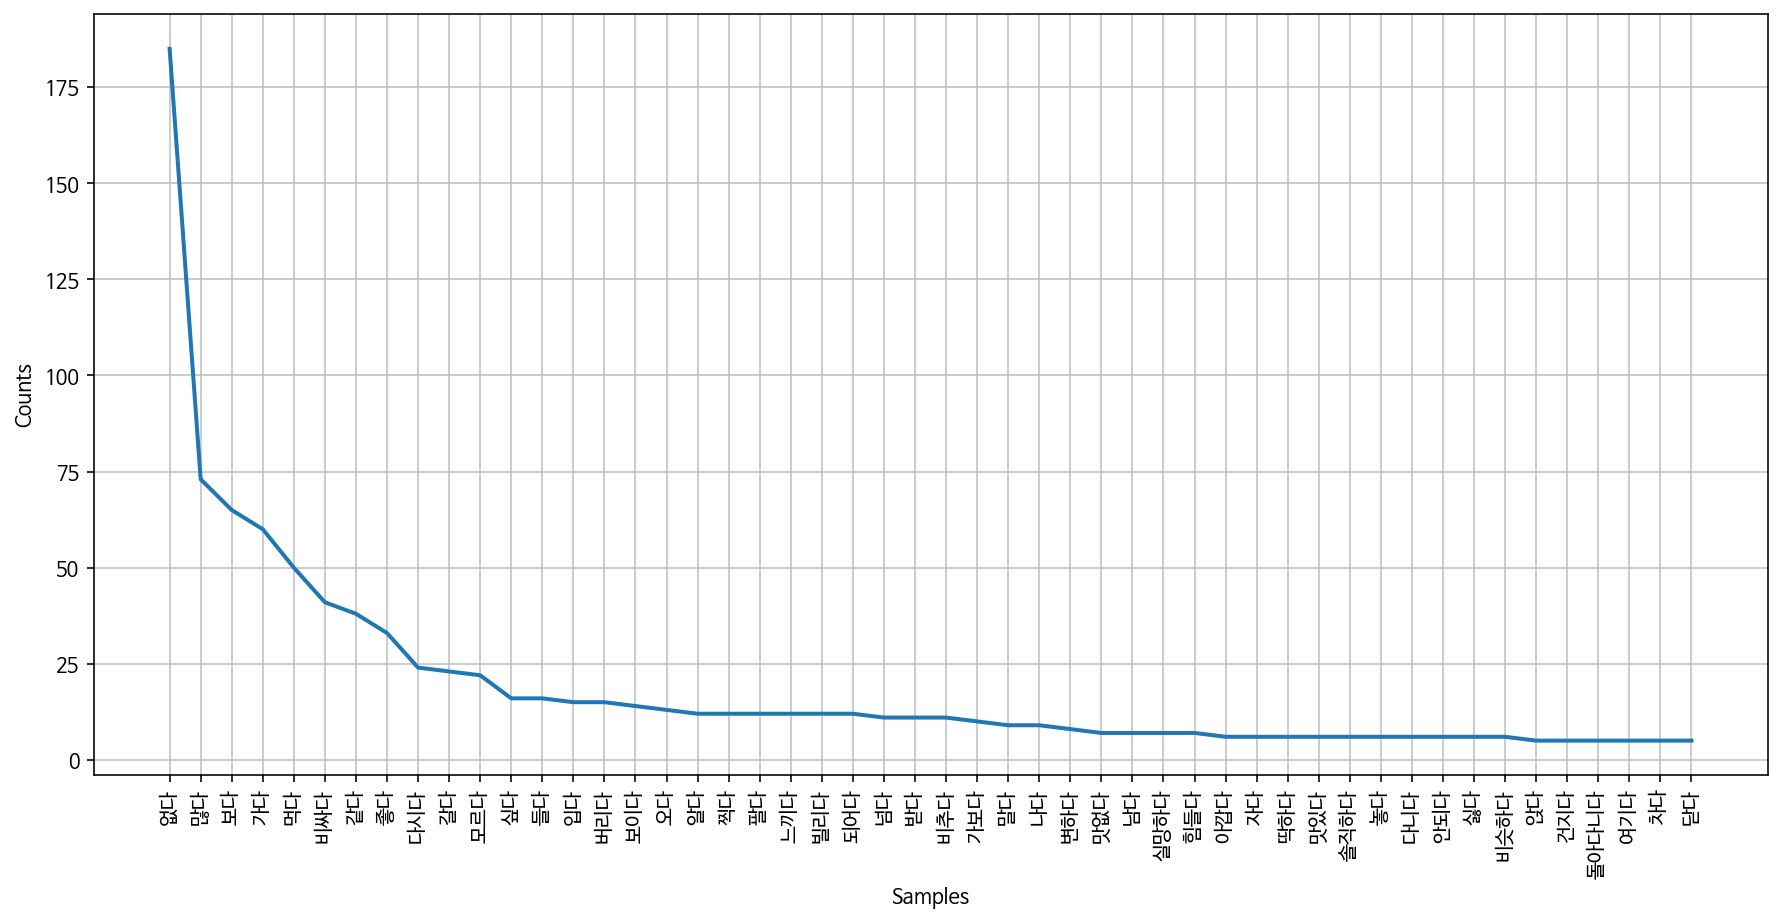

In [28]:
word_counted = nltk.Text(word_cleaned) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

### 별점별 명사, 동사 추이 분석

##### 명사 추이

In [29]:
word_cleaned1, sorted_word_dic1 = review_analysis(reviews, 'star', 1, 'Noun')
word_cleaned2, sorted_word_dic2 = review_analysis(reviews, 'star', 2, 'Noun')
word_cleaned3, sorted_word_dic3 = review_analysis(reviews, 'star', 3, 'Noun')
word_cleaned4, sorted_word_dic4 = review_analysis(reviews, 'star', 4, 'Noun')
word_cleaned5, sorted_word_dic5 = review_analysis(reviews, 'star', 5, 'Noun')

In [35]:
# 테스트
df_s2 = pd.DataFrame(sorted_word_dic2)
df_s2 = df_s2.set_index(0).rename(columns={1:2})
df_s2

,2
0,
마을,151
사람,74
한복,69
상업,65
음식,55
...,...
업적,1
국물,1
아숩다,1


In [48]:
s1 = pd.DataFrame(sorted_word_dic1).set_index(0)
s2 = pd.DataFrame(sorted_word_dic2).set_index(0).rename(columns={1:2})
s3 = pd.DataFrame(sorted_word_dic3).set_index(0).rename(columns={1:3})
s4 = pd.DataFrame(sorted_word_dic4).set_index(0).rename(columns={1:4})
s5 = pd.DataFrame(sorted_word_dic5).set_index(0).rename(columns={1:5})

In [49]:
s = pd.concat([s1, s2, s3, s4, s5], axis=1)
s

,1,2,3,4,5
0,,,,,
마을,138.0,151.0,388.0,462.0,570.0
사람,56.0,74.0,239.0,340.0,320.0
음식,54.0,55.0,145.0,147.0,169.0
한복,46.0,69.0,206.0,323.0,411.0
그냥,40.0,46.0,91.0,36.0,31.0
...,...,...,...,...,...
이서,NaN,NaN,NaN,NaN,1.0
바랑,NaN,NaN,NaN,NaN,1.0
비수,NaN,NaN,NaN,NaN,1.0


In [53]:
star_per = []
for i in range(1, 6):
    print(len(reviews[reviews['star'] == i]) / len(reviews) * 100, '%')
    star_per.append(len(reviews[reviews['star'] == i]) / len(reviews) * 100)

star_per

5.119887165021156 %
5.768688293370945 %
18.42031029619182 %
30.155148095909734 %
40.53596614950635 %


[5.119887165021156,
 5.768688293370945,
 18.42031029619182,
 30.155148095909734,
 40.53596614950635]

In [51]:
s_inner = s1.join(s2, how='inner').join(s3, how='inner').join(s4, how='inner').join(s5, how='inner')
s_inner

,1,2,3,4,5
0,,,,,
마을,138,151,388,462,570
사람,56,74,239,340,320
음식,54,55,145,147,169
한복,46,69,206,323,411
그냥,40,46,91,36,31
...,...,...,...,...,...
아이,1,3,15,39,62
걱정,1,2,3,1,3
겨울,1,1,4,15,10


In [68]:
for i in range(0, 5):
    s_inner[f'{i+1}_per'] = s_inner[i+1].apply(lambda x: x/star_per[i])

In [69]:
s_inner

,1,2,3,4,5,1_per,2_per,3_per,4_per,5_per
0,,,,,,,,,,
마을,138,151,388,462,570,26.953719,26.175795,21.063706,15.320767,14.061587
사람,56,74,239,340,320,10.937741,12.827873,12.974809,11.275023,7.894224
음식,54,55,145,147,169,10.547107,9.534230,7.871746,4.874790,4.169137
한복,46,69,206,323,411,8.984573,11.961125,11.183308,10.711272,10.139144
그냥,40,46,91,36,31,7.812672,7.974083,4.940199,1.193826,0.764753
...,...,...,...,...,...,...,...,...,...,...
아이,1,3,15,39,62,0.195317,0.520049,0.814319,1.293312,1.529506
걱정,1,2,3,1,3,0.195317,0.346699,0.162864,0.033162,0.074008
겨울,1,1,4,15,10,0.195317,0.173350,0.217152,0.497428,0.246695


In [70]:
s_temp = s_inner.copy()

In [71]:
s_temp['sum'] = s_temp.loc[:, '1_per':'5_per'].apply(np.sum, axis=1)
s_temp

,1,2,3,4,5,1_per,2_per,3_per,4_per,5_per,sum
0,,,,,,,,,,,
마을,138,151,388,462,570,26.953719,26.175795,21.063706,15.320767,14.061587,103.575573
사람,56,74,239,340,320,10.937741,12.827873,12.974809,11.275023,7.894224,55.909670
음식,54,55,145,147,169,10.547107,9.534230,7.871746,4.874790,4.169137,36.997010
한복,46,69,206,323,411,8.984573,11.961125,11.183308,10.711272,10.139144,52.979422
그냥,40,46,91,36,31,7.812672,7.974083,4.940199,1.193826,0.764753,22.685533
...,...,...,...,...,...,...,...,...,...,...,...
아이,1,3,15,39,62,0.195317,0.520049,0.814319,1.293312,1.529506,4.352502
걱정,1,2,3,1,3,0.195317,0.346699,0.162864,0.033162,0.074008,0.812050
겨울,1,1,4,15,10,0.195317,0.173350,0.217152,0.497428,0.246695,1.329940


In [74]:
s_per = s_temp.loc[:, '1_per':'5_per'].apply(lambda x: x/s_temp['sum']*100)
s_per

,1_per,2_per,3_per,4_per,5_per
0,,,,,
마을,26.023239,25.272170,20.336557,14.791873,13.576161
사람,19.563237,22.943925,23.206734,20.166500,14.119604
음식,28.508000,25.770271,21.276708,13.176172,11.268849
한복,16.958609,22.576926,21.108777,20.217798,19.137891
그냥,34.439006,35.150521,21.776870,5.262499,3.371104
...,...,...,...,...,...
아이,4.487461,11.948276,18.709207,29.714211,35.140846
걱정,24.052314,42.694327,20.055873,4.083718,9.113768
겨울,14.686136,13.034395,16.327925,37.402250,18.549295


In [75]:
s_inner

,1,2,3,4,5,1_per,2_per,3_per,4_per,5_per
0,,,,,,,,,,
마을,138,151,388,462,570,26.953719,26.175795,21.063706,15.320767,14.061587
사람,56,74,239,340,320,10.937741,12.827873,12.974809,11.275023,7.894224
음식,54,55,145,147,169,10.547107,9.534230,7.871746,4.874790,4.169137
한복,46,69,206,323,411,8.984573,11.961125,11.183308,10.711272,10.139144
그냥,40,46,91,36,31,7.812672,7.974083,4.940199,1.193826,0.764753
...,...,...,...,...,...,...,...,...,...,...
아이,1,3,15,39,62,0.195317,0.520049,0.814319,1.293312,1.529506
걱정,1,2,3,1,3,0.195317,0.346699,0.162864,0.033162,0.074008
겨울,1,1,4,15,10,0.195317,0.173350,0.217152,0.497428,0.246695


In [ ]:
# 긍 부정으로 나누는게 좋을까?

In [77]:
# 전주, 마을 : 불용어 처리로 따로 봐야할 듯.
a_a = ['마을', '전주', '전주시']

# 어찌 분류 모름
idontknow = ['사진', '전통', '시간', '방문', '대여', '하나', 
             '추천', '다시', '정도', '가격', '진짜', '전혀', '이제',
             '예전', '차라리', '여기', '매우', '가지', '완전', '문화',
             '대한', '모습', '가기', '가득', '이름', '특색', '어디', '복대',
             '쓰레기', '국적', '한번', '여행', '전부', '기전', '한국',
             '무슨', '주말' '물가', '또한', '보고', '서울', '가장', '잠시',
             '컨셉', '가야', '역사', '상업성', '고유', '오지', '지금', 
             '옛날', '사장', '퇴색', '기억', '도시', '대부분', '의미', '관광',
             '제대로', '날씨', '테마', '요즘', '전라도', '코로나',
             '때문', '필요', '정신', '확인', '인상', '처음', '평일', '어디가',
             '이상', '점점', '이용', '관리', '전기', '찾기', '개량', '아주',
             '달리', '전체', '중간', '가시', '여름', '다른', '자체', '사실',
             '천지', '오목', '근처', '고장', '고풍', '찍기', '옥상', '서서',
             '가요', '운영', '제일', '개발', '인근', '수준', '전통문화',
             '보이', '대박', '업적', '비교', '외국', '가치', '문제', '임대',
             '명성', '단지', '특유', '인심', '세계', '잔뜩', '무엇', '물건',
             '몇번', '추억', '바로', '냄새', '부분', '안동', '월요일', '복장',
             '기도', '투어', '이번', '홍대', '개성', '모두', '표현', '계속',
             '각종', '만해', '뭔가', '만하', '본질', '규모', '곳곳', '변화',
             '이전', '이색', '걷기', '주로', '다음', '모든', '사용', '그것',
             '편이', '보기', '지도', '멀리', '방송', '퓨전', '모양', '사주',
             '역시', '이해', '시기', '배려', '잠깐', '집들이', '정돈', '발생',
             '그거', '직접', '공영', '일찍', '구석구석', '경기', '거의', '누구',
             '나름', '개화', '갈수록', '조성', '형성', '부족', '관련', '그다지',
             '겨울']

# 얘는 뭘까 + 중요할수도 잇는 것들(반전)
why = ['천국', '무상', '오히려', '다만', '불편', '인위']

# 빼야할거 같어
minus = ['번은', '곳도', '인지', '이면', '가면', '사고', '일이', '가세',
         '안보', '이나', '등등', '이기', '위해', '하니', '읍니']

# 즐길거리 - 체험
enjoy = ['체험']

# 느낌적인 느낌
feel = ['그냥', '별로', '생각', '정말', '느낌', '실망', '후회', '분위기',
        '별루', '정취', '아쉬움', '그닥', '재미', '기대', '굳이', '기분',
        '부담', '걱정']

# 사람 관련 + 밀집
human = ['사람', '관광객', '우리', '손님', '외국인', '개인', '번잡', '친구',
         '젊은이', '여행객', '주인', '본인', '북적', '커플', '가족', '청년',
         '아이']

# 먹거리 종류, 장소, 음식
dishes = ['먹거리', '식당', '비빔밥', '꼬치', '초코파이', '군것질', '구이',
          '간식', '탕후루', '아이스크림', '맛집', '커피', '육회', '떡갈비',
          '식사', '만두', '닭꼬치', '콩나물', '국밥', '치즈', '문어', '까페',
          '주전부리']

# 교통 : 주차, 버스 등
transport=['주차', '주차장', '스쿠터', '오토바이', '바이크', '택시',
           '대중교통', '전동차', '차량', '차비', '교통', '셔틀버스']

# 즐길 컨텐츠? - 돈
goods = ['한복', '가게', '장사', '상가', '상술', '시장', '상점',
         '상업', '상인', '바가지', '야시장', '판매점', '숙박',
         '숙소', '간판',  '카페', '컨텐츠', '서비스', 
         '옥집', '숙박시설', '상권', '축제', '한복집',
         '기념품', '관람', '운치', '현금', '쇼핑', '공연',
         '숙박업소', '만원', '전시', '남부', '상품', '의상',
         '풍년제', '입장료', '무료', '그림', '전시관', '학교',
         '게스트하우스', '매장', '영업', '장터', '노점']

# 건물이 있어야 하려나

# 관광 환경(시각적, 공간적)
env = ['거리', '볼거리', '길거리', '구경', '관광지', '골목', '공간',
       '장소', '건물', '북촌', '지붕', '동네', '지역', '주변', '풍경',
       '기와', '시설', '도로', '민속촌', '전동성당', '전동', '성당',
       '경치', '소리', '파크', '입구', '공사', '내부', '가옥', '산책',
       '코스', '데이트', '기와집', '태조', '화장실']

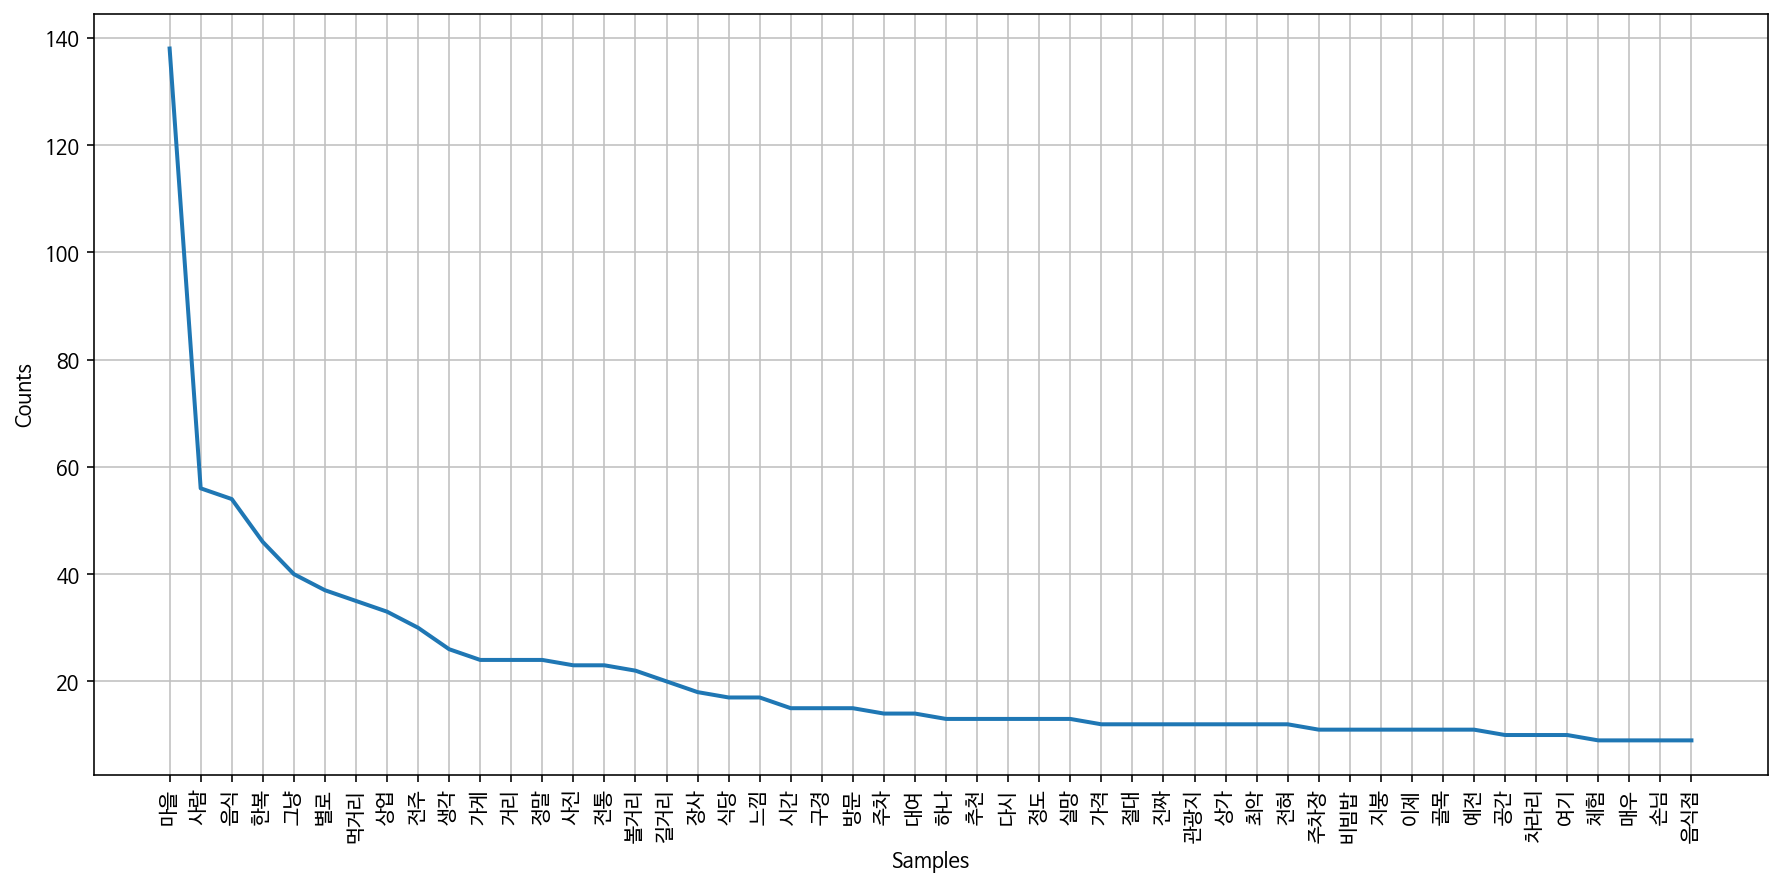

In [78]:
word_counted = nltk.Text(word_cleaned1) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

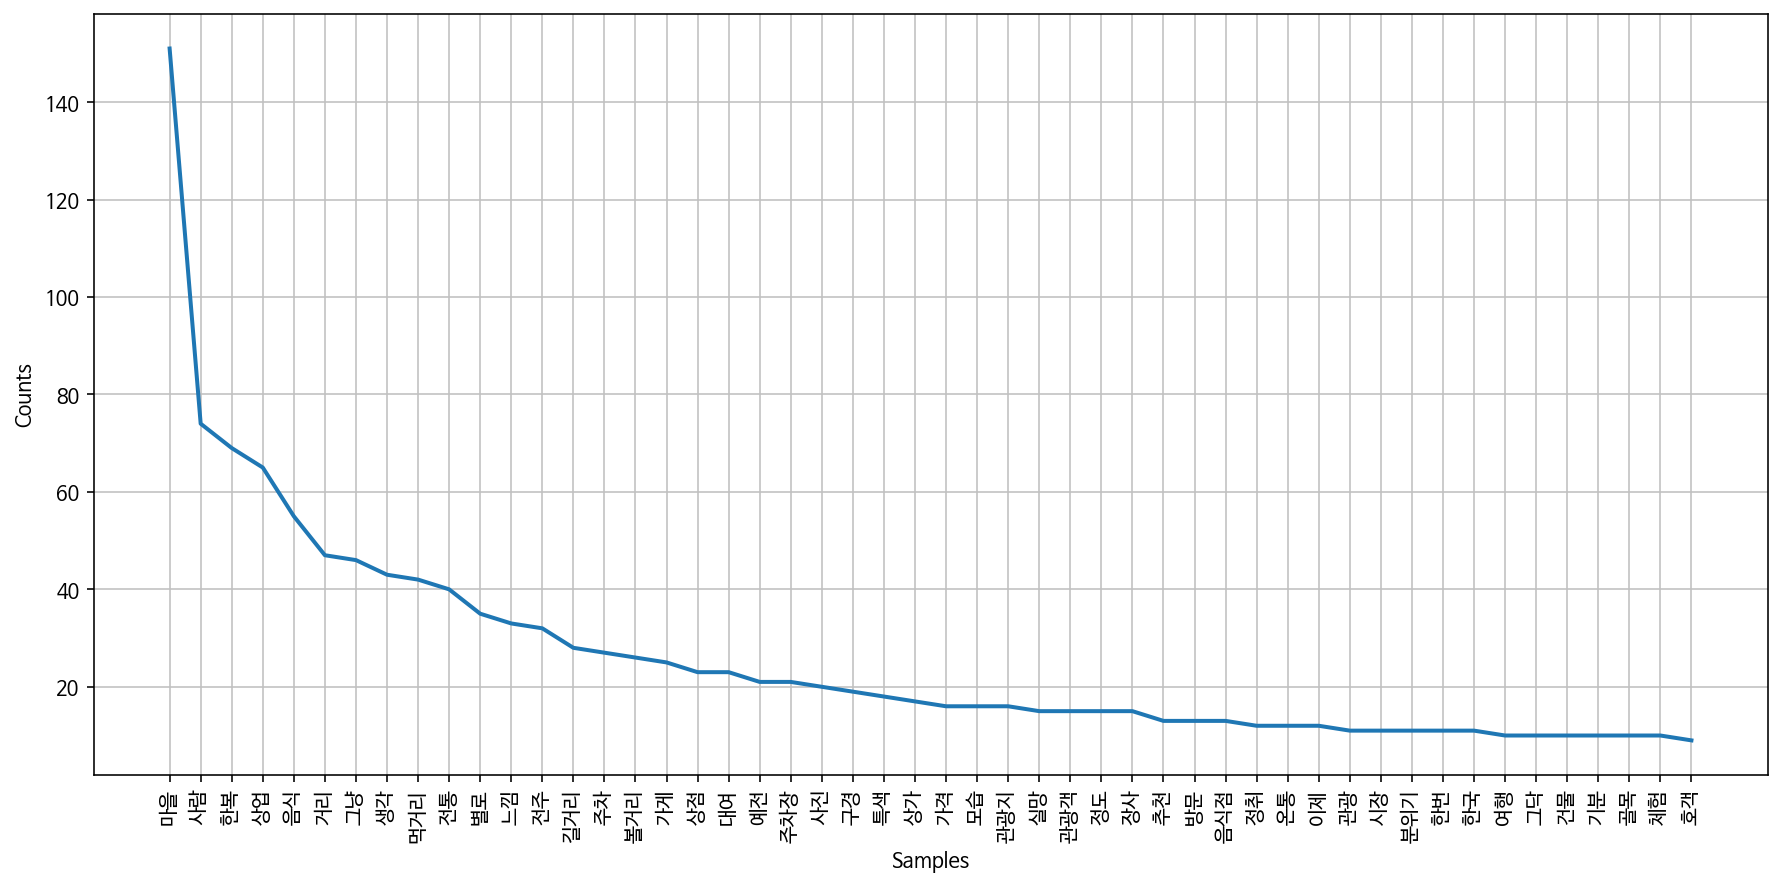

In [79]:
word_counted = nltk.Text(word_cleaned2) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

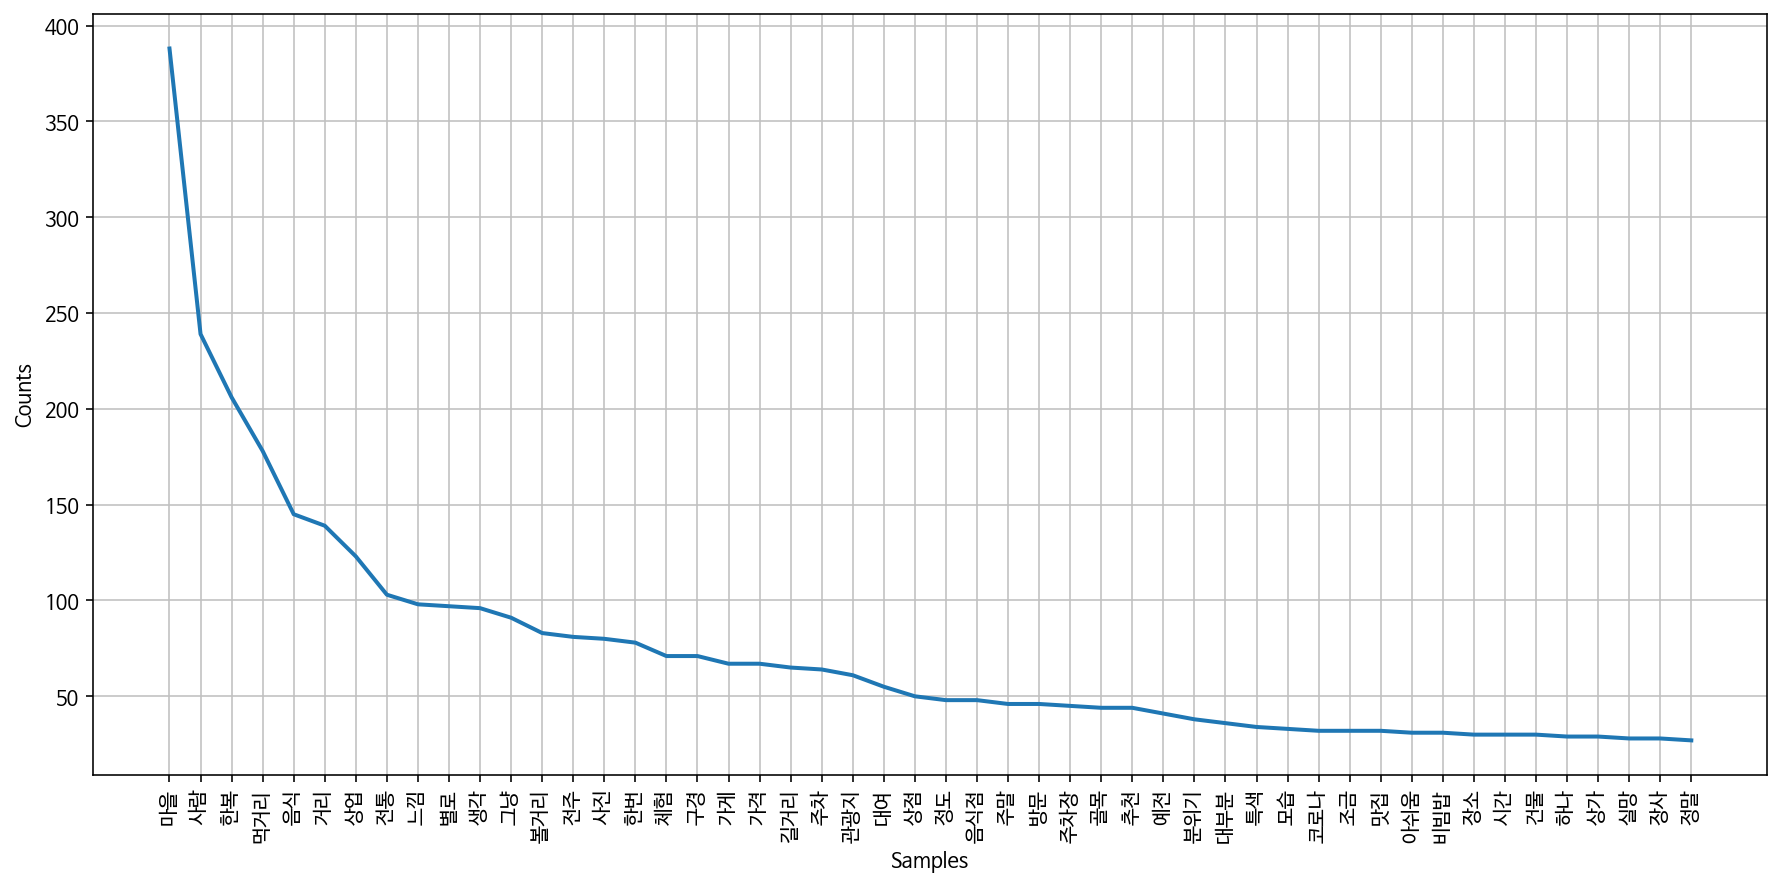

In [80]:
word_counted = nltk.Text(word_cleaned3) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

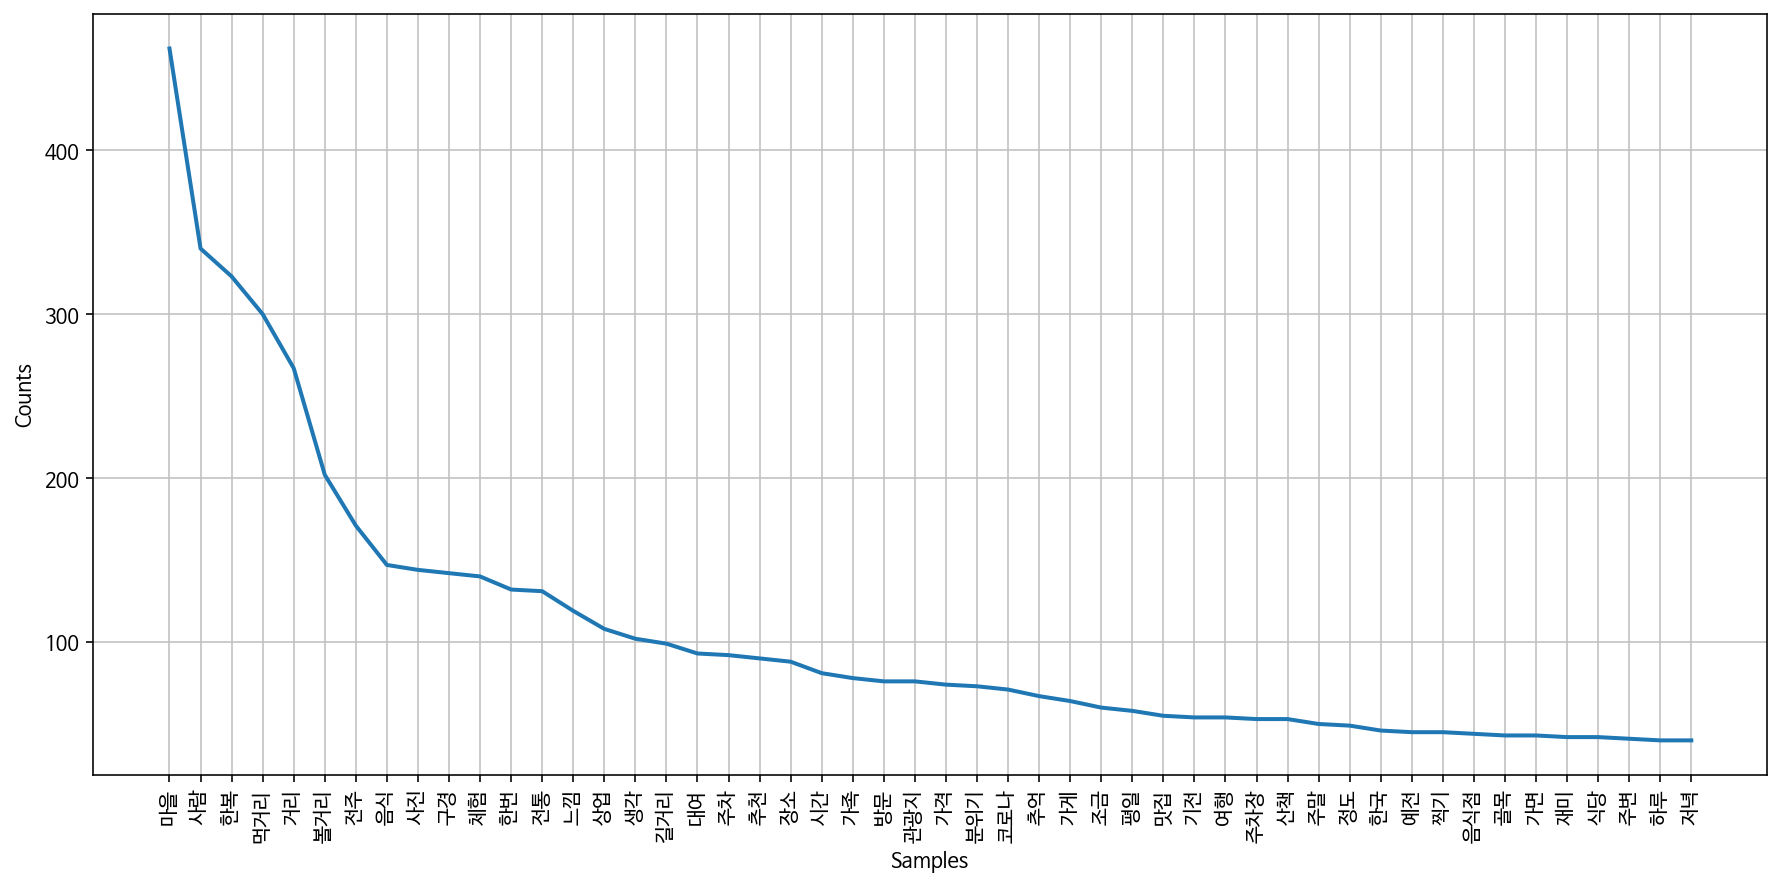

In [81]:
word_counted = nltk.Text(word_cleaned4) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

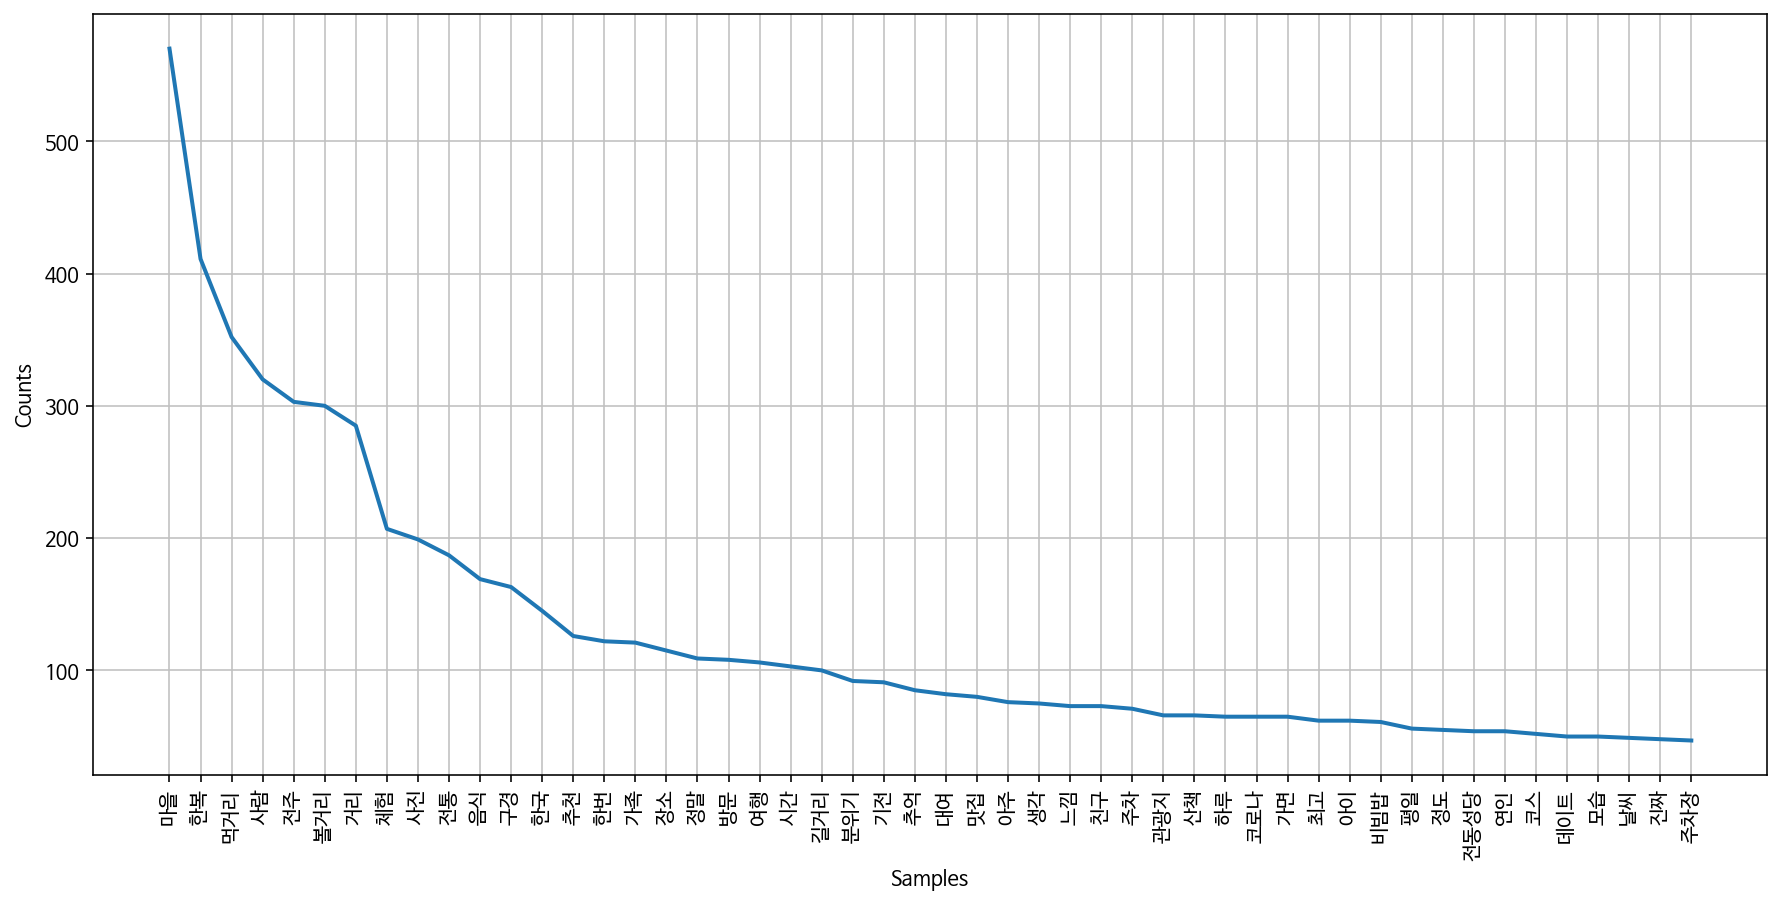

In [82]:
word_counted = nltk.Text(word_cleaned5) 
plt.figure(figsize=(15, 7)) # plot 영역(그래프 영역)의 크기를 지정합니다.
word_counted.plot(50) # "plot" the graph, 상위 50개 단어를 보여줍니다.

In [83]:
s_inner

,1,2,3,4,5,1_per,2_per,3_per,4_per,5_per
0,,,,,,,,,,
마을,138,151,388,462,570,26.953719,26.175795,21.063706,15.320767,14.061587
사람,56,74,239,340,320,10.937741,12.827873,12.974809,11.275023,7.894224
음식,54,55,145,147,169,10.547107,9.534230,7.871746,4.874790,4.169137
한복,46,69,206,323,411,8.984573,11.961125,11.183308,10.711272,10.139144
그냥,40,46,91,36,31,7.812672,7.974083,4.940199,1.193826,0.764753
...,...,...,...,...,...,...,...,...,...,...
아이,1,3,15,39,62,0.195317,0.520049,0.814319,1.293312,1.529506
걱정,1,2,3,1,3,0.195317,0.346699,0.162864,0.033162,0.074008
겨울,1,1,4,15,10,0.195317,0.173350,0.217152,0.497428,0.246695


In [106]:
star_final = s_inner.copy()
star_final['sum'] = star_final.loc[:, 1:5].apply(np.sum, axis=1)
# star_final['sum_per'] = star_final.loc[:, '1_per':'5_per'].apply(np.sum, axis=1)
star_final

,1,2,3,4,5,1_per,2_per,3_per,4_per,5_per,sum
0,,,,,,,,,,,
마을,138,151,388,462,570,26.953719,26.175795,21.063706,15.320767,14.061587,1709
사람,56,74,239,340,320,10.937741,12.827873,12.974809,11.275023,7.894224,1029
음식,54,55,145,147,169,10.547107,9.534230,7.871746,4.874790,4.169137,570
한복,46,69,206,323,411,8.984573,11.961125,11.183308,10.711272,10.139144,1055
그냥,40,46,91,36,31,7.812672,7.974083,4.940199,1.193826,0.764753,244
...,...,...,...,...,...,...,...,...,...,...,...
아이,1,3,15,39,62,0.195317,0.520049,0.814319,1.293312,1.529506,120
걱정,1,2,3,1,3,0.195317,0.346699,0.162864,0.033162,0.074008,10
겨울,1,1,4,15,10,0.195317,0.173350,0.217152,0.497428,0.246695,31


In [107]:
star_final.drop(labels=['마을', '전주', '전주시'], inplace=True)

In [144]:
# sf_15 = star_final.sort_values(by=['1_per', '2_per', '3_per', '4_per', '5_per'], ascending=False).iloc[:, 5:-1]
# sf_51 = star_final.sort_values(by=['5_per', '4_per', '3_per', '2_per', '1_per'], ascending=False).iloc[:, 5:-1]
sf_sum = star_final.sort_values(by=['sum'], ascending=False).iloc[:, 5:-1]

In [ ]:
# for i in range(10):
#     plt.plot(sf_15.columns, sf_15.iloc[i], label=f'{sf_15.index.tolist()[i]}')

# plt.legend(loc='best')
# plt.style.use('ggplot')

In [ ]:
# for i in range(10):
#     plt.plot(sf_51.columns, sf_51.iloc[i], label=f'{sf_51.index.tolist()[i]}')

# plt.legend(loc='best')
# plt.style.use('ggplot')

In [ ]:
# 1점에서 빈도수?로 가장 높은 걸로 해봤음
# 그래프 기울기가 음수면, 부정적 인식을 나타냄.
# 이렇게 할거면 15나 51이나 필요 없고 sum으로 하는게 좋을거같어.

In [161]:
sf_sum

,1_per,2_per,3_per,4_per,5_per
0,,,,,
한복,8.984573,11.961125,11.183308,10.711272,10.139144
사람,10.937741,12.827873,12.974809,11.275023,7.894224
먹거리,6.836088,7.280685,9.663247,9.948550,8.683646
거리,4.687603,8.147433,7.546018,8.854210,7.030793
볼거리,4.296970,4.507090,4.505896,6.698690,7.400835
...,...,...,...,...,...
사용,0.195317,0.173350,0.108576,0.033162,0.049339
배려,0.195317,0.173350,0.054288,0.033162,0.049339
그림,0.195317,0.173350,0.054288,0.033162,0.049339


(0.0, 14.0)

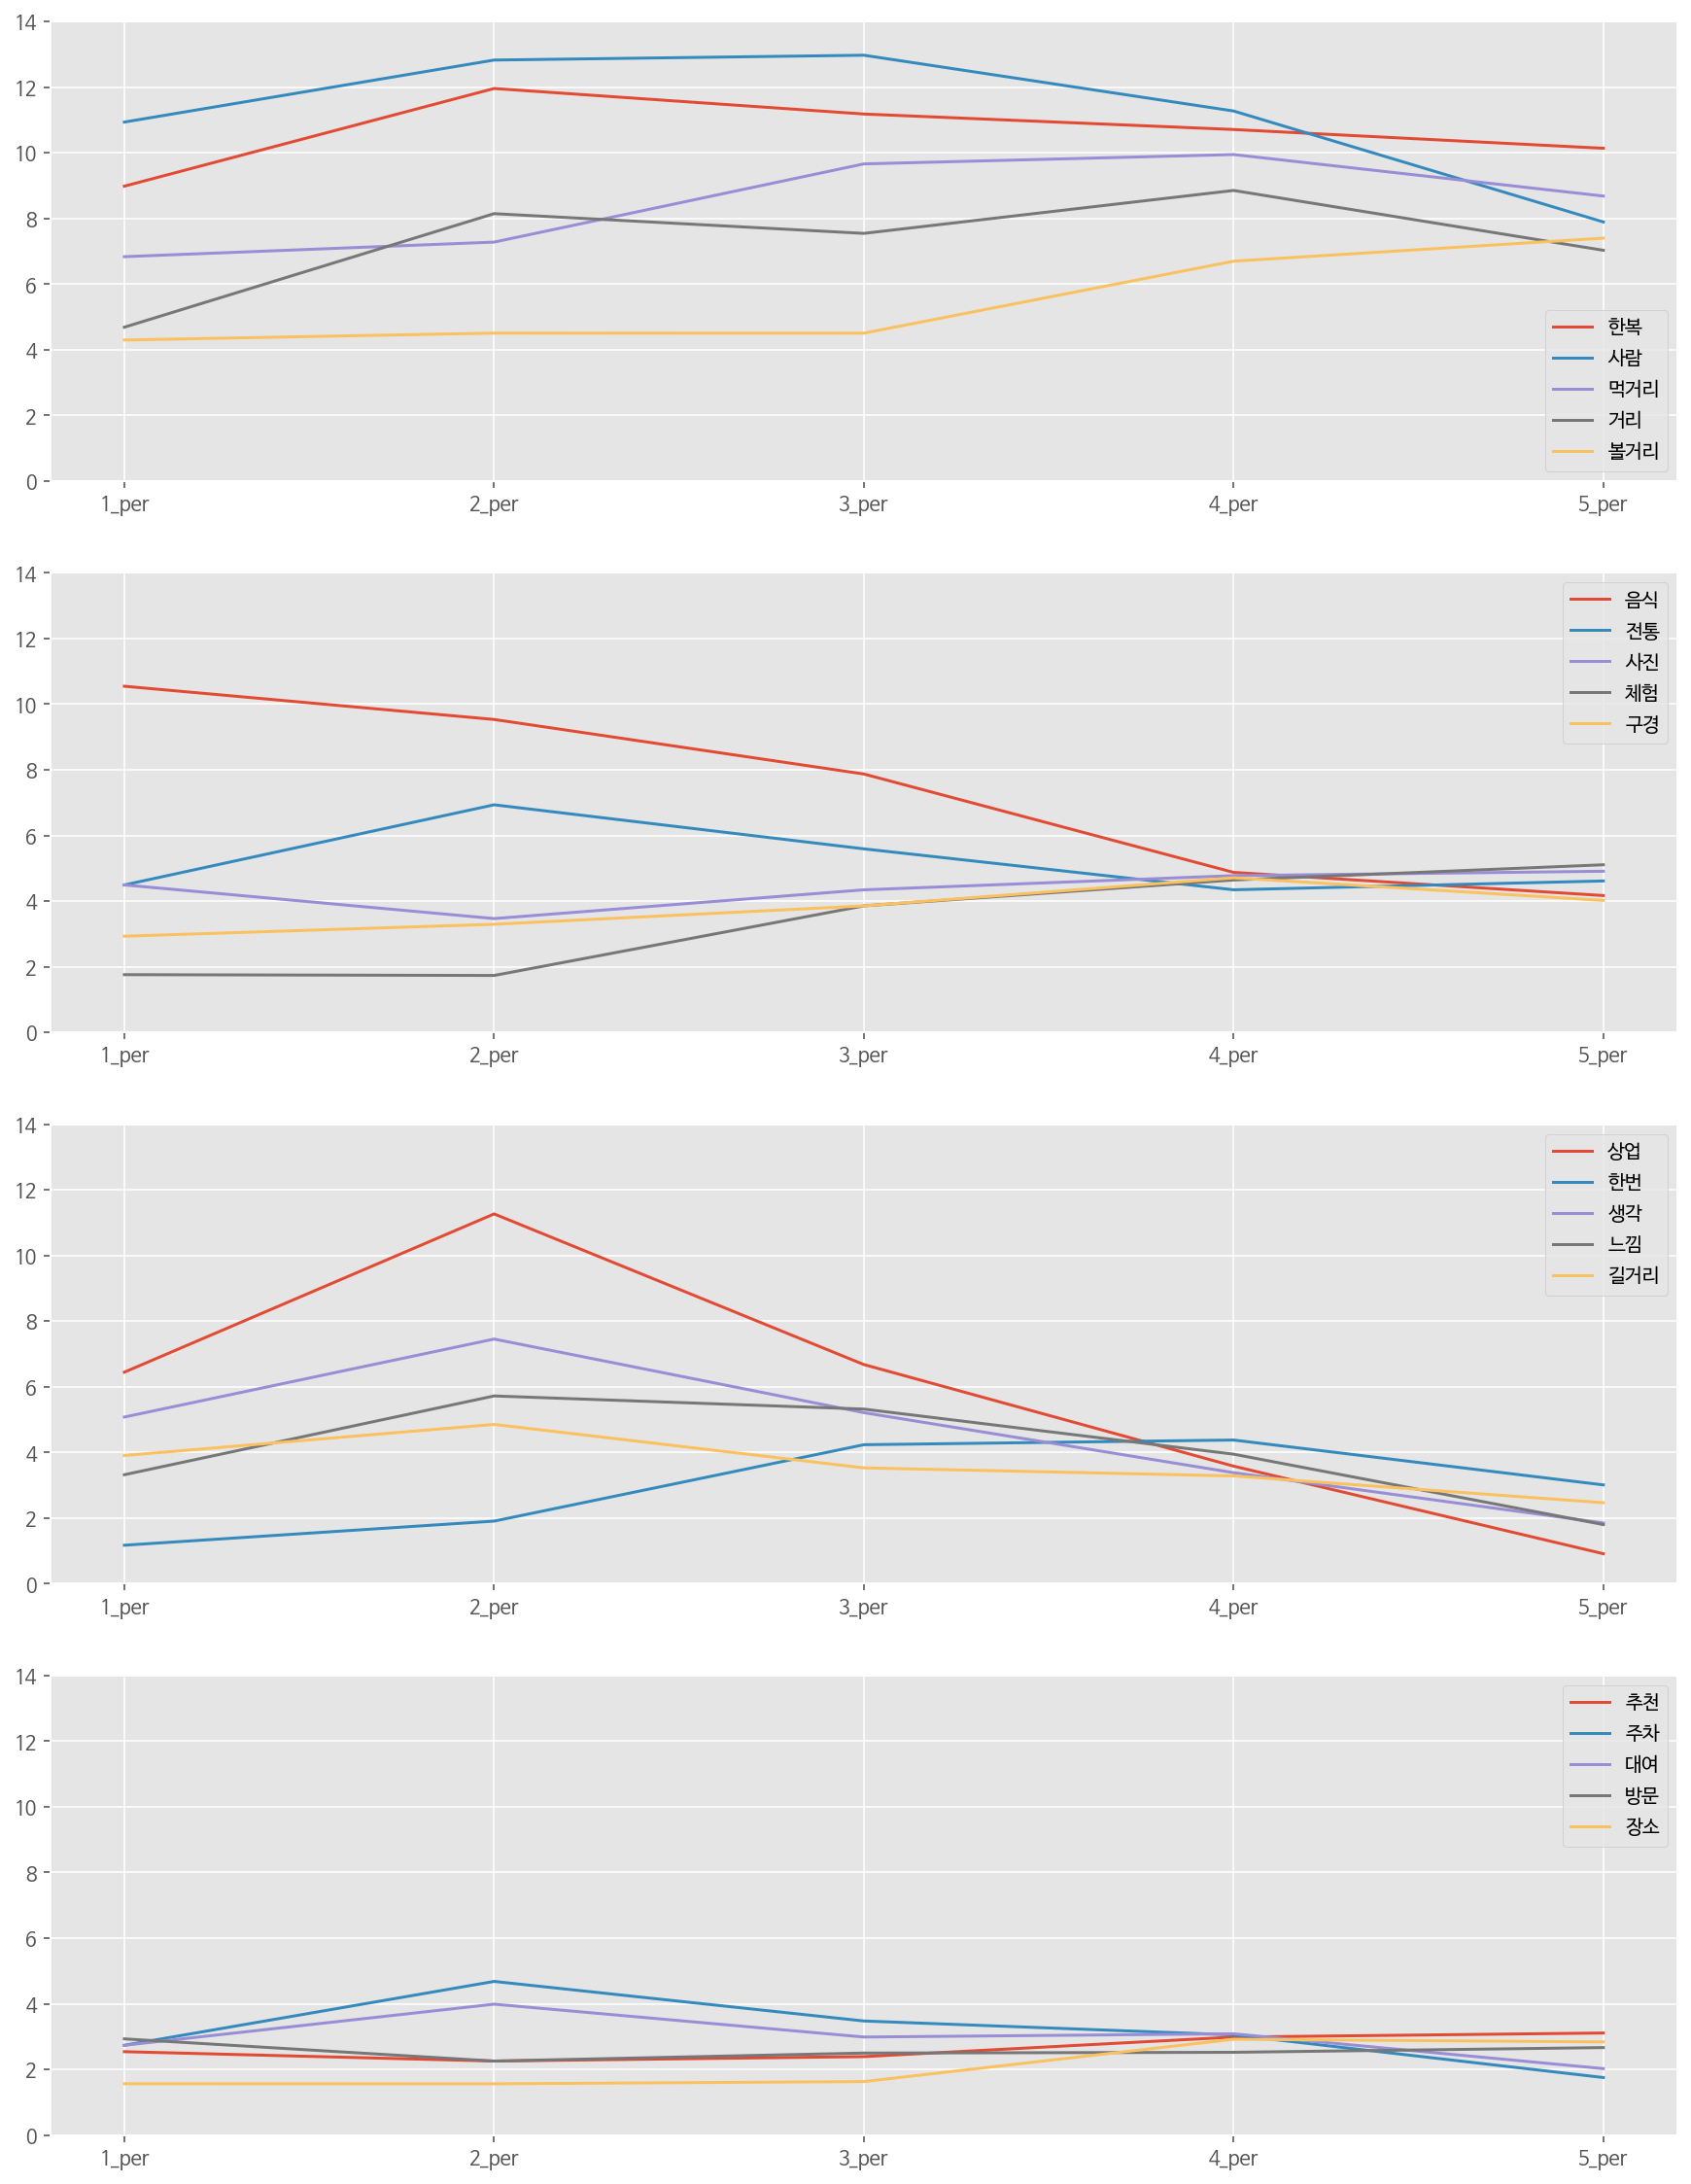

In [159]:
fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

for i in range(5):
    ax1.plot(sf_sum.columns, sf_sum.iloc[i], label=f'{sf_sum.index.tolist()[i]}')
for i in range(5, 10):
    ax2.plot(sf_sum.columns, sf_sum.iloc[i], label=f'{sf_sum.index.tolist()[i]}')
for i in range(10, 15):
    ax3.plot(sf_sum.columns, sf_sum.iloc[i], label=f'{sf_sum.index.tolist()[i]}')
for i in range(15, 20):
    ax4.plot(sf_sum.columns, sf_sum.iloc[i], label=f'{sf_sum.index.tolist()[i]}')

ax1.legend(loc='best')
ax1.set_ylim(0, 14)
ax2.legend(loc='best')
ax2.set_ylim(0, 14)
ax3.legend(loc='best')
ax3.set_ylim(0, 14)
ax4.legend(loc='best')
ax4.set_ylim(0, 14)
# plt.style.use('ggplot')

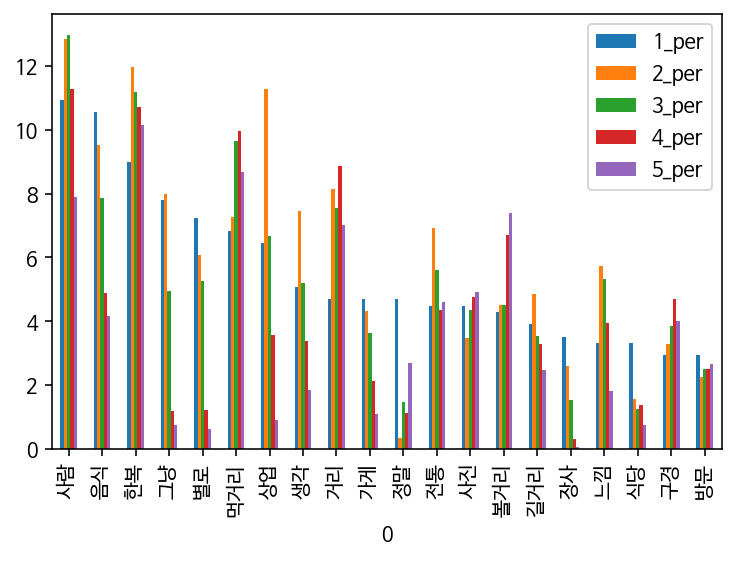

In [95]:
star_final.iloc[:20, 5:-1].plot(kind='bar')

##### 텍스트 분석이나 해보자


In [165]:
word_cleaned1, sorted_word_dic1 = review_analysis(reviews, 'star', 1, 'Noun')
word_cleaned2, sorted_word_dic2 = review_analysis(reviews, 'star', 2, 'Noun')
word_cleaned3, sorted_word_dic3 = review_analysis(reviews, 'star', 3, 'Noun')
word_cleaned4, sorted_word_dic4 = review_analysis(reviews, 'star', 4, 'Noun')
word_cleaned5, sorted_word_dic5 = review_analysis(reviews, 'star', 5, 'Noun')

In [ ]:
dict(sorted_word_dic3)

In [180]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

# 도화지 소환
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       # font_path="C:/Windows/Fonts/NanumSquareB.ttf" <- 나눔스퀘어 폰트가 설치되어 있을 경우
                       # font_path="/System/Library/Fonts/Supplemental/AppleGothic.ttf <- MacOS의 경우
                       
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [176]:
word_dic = {}
for word in word_cleaned1:
    if word not in word_dic:
        word_dic[word] = 1 
    else:
        word_dic[word] += 1


In [179]:
word_dic

{'전체': 2,
 '음식': 54,
 '가격': 12,
 '물건': 1,
 '중간': 2,
 '마을': 138,
 '해설': 1,
 '부스': 1,
 '표지판': 1,
 '저쪽': 1,
 '그냥': 40,
 '체험': 9,
 '하나': 13,
 '제대로': 3,
 '가게': 24,
 '한쪽': 3,
 '구석': 2,
 '공간': 10,
 '공연': 1,
 '장사': 18,
 '거리': 24,
 '성당': 4,
 '상점': 7,
 '전주': 30,
 '식당': 17,
 '주차장': 11,
 '절대': 12,
 '가지': 8,
 '가시': 2,
 '후회': 8,
 '원래': 3,
 '비빔밥': 11,
 '생각': 26,
 '몇번': 1,
 '도지사': 1,
 '표창': 1,
 '육회': 2,
 '고기': 1,
 '천만': 1,
 '호갱': 2,
 '별로': 37,
 '보이지': 2,
 '정말': 24,
 '사람': 56,
 '야시장': 5,
 '느낌': 17,
 '친구': 1,
 '한복': 46,
 '추억': 1,
 '사진': 23,
 '추천': 13,
 '완전': 8,
 '길거리': 20,
 '여행': 5,
 '또한': 4,
 '주차': 14,
 '시간': 15,
 '오히려': 1,
 '진짜': 12,
 '보고': 4,
 '서울': 4,
 '북촌': 7,
 '교동': 2,
 '한식': 3,
 '한정식': 3,
 '낙지': 2,
 '볶음': 2,
 '버섯': 2,
 '구이': 3,
 '러시': 1,
 '달랑': 1,
 '카페': 4,
 '숙박업소': 1,
 '나라': 2,
 '가장': 4,
 '장소': 8,
 '바로': 1,
 '처서': 1,
 '가도': 1,
 '다만': 1,
 '여름': 2,
 '휴가': 1,
 '마지막': 2,
 '들럿던곳': 1,
 '년전': 1,
 '아쉬움': 4,
 '다시': 13,
 '혹시': 1,
 '더니': 1,
 '여기저기': 3,
 '상업': 33,
 '냄새': 1,
 '외국인': 5,
 '관광객': 7,
 '잠시': 4,
 

In [184]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.
# 도화지 위에 freq 기준으로 그려라

# word_cloud.generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수도 있습니다.

OSError: ignored

In [ ]:
# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()